data : https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis

## 데이터에 대한 나의 생각

데이터 중 Customer Name ,Customer Age, Gender이 Faker로 생성되었다고 한다.      
Faker로 생성된 데이터는 실제 고객 데이터가 아니므로 랜덤성이 강하다.

-> 데이터가 현실적이지 않으면 분석 결과도 의미 있는 인사이트를 도출하기 어렵다고 판단했다.

하지만 Faker 데이터가 현실적이지 않더라도 Cohort Analysis 연습과 시각화에는 충분히 활용 가능하다고 생각했고, 이 데이터는 Cohort를 만들어 보는 연습에 활용할 예정이다.

faker란? : https://wikidocs.net/105448

In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("c:\data\e-commerce\ecommerce_customer_data_large.csv")
df.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0


In [2]:
df.columns = ['customer_id', 'purchase_date', 'product_category', 'product_price', 'quantity', 'total_purchase_amount', 'payment_method', 'customer_age', 'returns', 'customer_name', 'age', 'gender', 'churn']
df.drop(['customer_name', 'age'], axis=1, inplace=True) # customer_age와 중복되는 컬럼 age 제거함
df.columns

Index(['customer_id', 'purchase_date', 'product_category', 'product_price',
       'quantity', 'total_purchase_amount', 'payment_method', 'customer_age',
       'returns', 'gender', 'churn'],
      dtype='object')

In [3]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df = df.sort_values(by='purchase_date', ascending=True)

print(df['purchase_date'].dtypes)

datetime64[ns]


In [4]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['purchase_month'] = df['purchase_date'].apply(get_month)
df.head(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month
231894,11789,2020-01-01 00:07:26,Clothing,426,4,2046,Cash,45,1.0,Male,0,2020-01-01
159409,48592,2020-01-01 00:11:40,Clothing,160,4,2514,Cash,49,0.0,Male,0,2020-01-01


In [5]:
df['purchase_month'] = df.groupby('customer_id')['purchase_month'].transform('min')

# 최소한 1년은 구매하지 않은 고객을 선정함
customer2022 = df[df['purchase_month'].dt.year >= 2022]

print(customer2022.shape)
customer2022.head(2)

(7640, 12)


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month
227286,4248,2022-01-01 01:31:58,Clothing,320,2,4385,PayPal,40,1.0,Female,0,2022-01-01
125613,11491,2022-01-01 01:40:59,Electronics,21,1,727,PayPal,44,0.0,Female,0,2022-01-01


In [6]:
customer2022['purchase_month'] = customer2022.groupby('customer_id')['purchase_month'].transform('min')
customer2022.tail(3)

C:\Users\User\AppData\Local\Temp\ipykernel_25616\588306015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2022['purchase_month'] = customer2022.groupby('customer_id')['purchase_month'].transform('min')


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month
148090,7273,2023-09-13 11:21:17,Books,198,4,866,PayPal,64,1.0,Male,0,2022-11-01
128110,36870,2023-09-13 14:45:44,Clothing,39,3,4655,Credit Card,50,NaN,Male,1,2022-01-01
226889,28266,2023-09-13 14:47:38,Books,466,5,2154,PayPal,44,1.0,Female,0,2022-11-01


In [7]:
def get_data_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [8]:
_, purchase_month, purchase_year = get_data_elements(customer2022, 'purchase_date')
_, cohort_month, cohort_year = get_data_elements(customer2022, 'purchase_month')
display(purchase_month.tail(2))
display(cohort_month.tail(2))

128110    9
226889    9
Name: purchase_date, dtype: int32

128110     1
226889    11
Name: purchase_month, dtype: int32

In [9]:
year_diff = purchase_year - cohort_year
month_diff = purchase_month - cohort_month
customer2022['cohort_index'] = year_diff * 12 + month_diff + 1 # 시작을 1부터 하기 위한 +1 
customer2022.tail(2)

C:\Users\User\AppData\Local\Temp\ipykernel_25616\4242676863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2022['cohort_index'] = year_diff * 12 + month_diff + 1 # 시작을 1부터 하기 위한 +1


,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index
128110,36870,2023-09-13 14:45:44,Clothing,39,3,4655,Credit Card,50,NaN,Male,1,2022-01-01,21
226889,28266,2023-09-13 14:47:38,Books,466,5,2154,PayPal,44,1.0,Female,0,2022-11-01,11


In [10]:
# temp
print(customer2022[customer2022['customer_id'] == 36870])

        customer_id       purchase_date product_category  product_price  \
128106        36870 2022-01-04 02:25:53      Electronics             47   
128108        36870 2022-04-08 05:55:32             Home            149   
128109        36870 2023-06-10 13:07:53         Clothing            343   
128107        36870 2023-07-10 07:00:01            Books            178   
128110        36870 2023-09-13 14:45:44         Clothing             39   

        quantity  total_purchase_amount payment_method  customer_age  returns  \
128106         4                   1697    Credit Card            50      1.0   
128108         3                   2174    Credit Card            50      0.0   
128109         1                   3036         PayPal            50      1.0   
128107         2                   2013         PayPal            50      0.0   
128110         3                   4655    Credit Card            50      NaN   

       gender  churn purchase_month  cohort_index  
128106   M

In [11]:
cohort_df = customer2022.groupby(['purchase_month', 'cohort_index'])['customer_id'].apply(pd.Series.nunique).reset_index()
display(cohort_df.head(5))
display(cohort_df.tail(5))

,purchase_month,cohort_index,customer_id
0,2022-01-01,1,364
1,2022-01-01,2,37
2,2022-01-01,3,38
3,2022-01-01,4,36
4,2022-01-01,5,43


,purchase_month,cohort_index,customer_id
225,2023-07-01,2,7
226,2023-07-01,3,3
227,2023-08-01,1,59
228,2023-08-01,2,2
229,2023-09-01,1,14


In [12]:
cohort_table = cohort_df.pivot(index='purchase_month', columns=['cohort_index'], values='customer_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
2022-01-01,364.0,37.0,38.0,36.0,43.0,37.0,38.0,43.0,44.0,48.0,...,50.0,28.0,46.0,45.0,37.0,30.0,41.0,40.0,48.0,20.0
2022-02-01,300.0,36.0,44.0,37.0,31.0,36.0,35.0,28.0,33.0,32.0,...,33.0,23.0,27.0,35.0,32.0,34.0,35.0,40.0,17.0,NaN
2022-03-01,312.0,34.0,34.0,28.0,32.0,33.0,36.0,34.0,35.0,32.0,...,37.0,39.0,28.0,31.0,28.0,34.0,29.0,10.0,NaN,NaN
2022-04-01,250.0,23.0,22.0,25.0,25.0,22.0,30.0,26.0,18.0,21.0,...,23.0,23.0,22.0,19.0,35.0,29.0,14.0,NaN,NaN,NaN
2022-05-01,233.0,32.0,24.0,26.0,23.0,22.0,27.0,26.0,28.0,23.0,...,29.0,27.0,25.0,15.0,24.0,16.0,NaN,NaN,NaN,NaN
2022-06-01,214.0,15.0,21.0,27.0,17.0,19.0,20.0,15.0,23.0,32.0,...,24.0,19.0,24.0,26.0,9.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,172.0,20.0,22.0,28.0,20.0,26.0,16.0,14.0,31.0,16.0,...,19.0,16.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,160.0,16.0,15.0,26.0,26.0,16.0,15.0,12.0,15.0,18.0,...,11.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,133.0,13.0,15.0,16.0,11.0,14.0,13.0,12.0,15.0,19.0,...,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,364.0,37.0,38.0,36.0,43.0,37.0,38.0,43.0,44.0,48.0,...,50.0,28.0,46.0,45.0,37.0,30.0,41.0,40.0,48.0,20.0
February 2022,300.0,36.0,44.0,37.0,31.0,36.0,35.0,28.0,33.0,32.0,...,33.0,23.0,27.0,35.0,32.0,34.0,35.0,40.0,17.0,NaN
March 2022,312.0,34.0,34.0,28.0,32.0,33.0,36.0,34.0,35.0,32.0,...,37.0,39.0,28.0,31.0,28.0,34.0,29.0,10.0,NaN,NaN
April 2022,250.0,23.0,22.0,25.0,25.0,22.0,30.0,26.0,18.0,21.0,...,23.0,23.0,22.0,19.0,35.0,29.0,14.0,NaN,NaN,NaN
May 2022,233.0,32.0,24.0,26.0,23.0,22.0,27.0,26.0,28.0,23.0,...,29.0,27.0,25.0,15.0,24.0,16.0,NaN,NaN,NaN,NaN
June 2022,214.0,15.0,21.0,27.0,17.0,19.0,20.0,15.0,23.0,32.0,...,24.0,19.0,24.0,26.0,9.0,NaN,NaN,NaN,NaN,NaN
July 2022,172.0,20.0,22.0,28.0,20.0,26.0,16.0,14.0,31.0,16.0,...,19.0,16.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,160.0,16.0,15.0,26.0,26.0,16.0,15.0,12.0,15.0,18.0,...,11.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,133.0,13.0,15.0,16.0,11.0,14.0,13.0,12.0,15.0,19.0,...,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

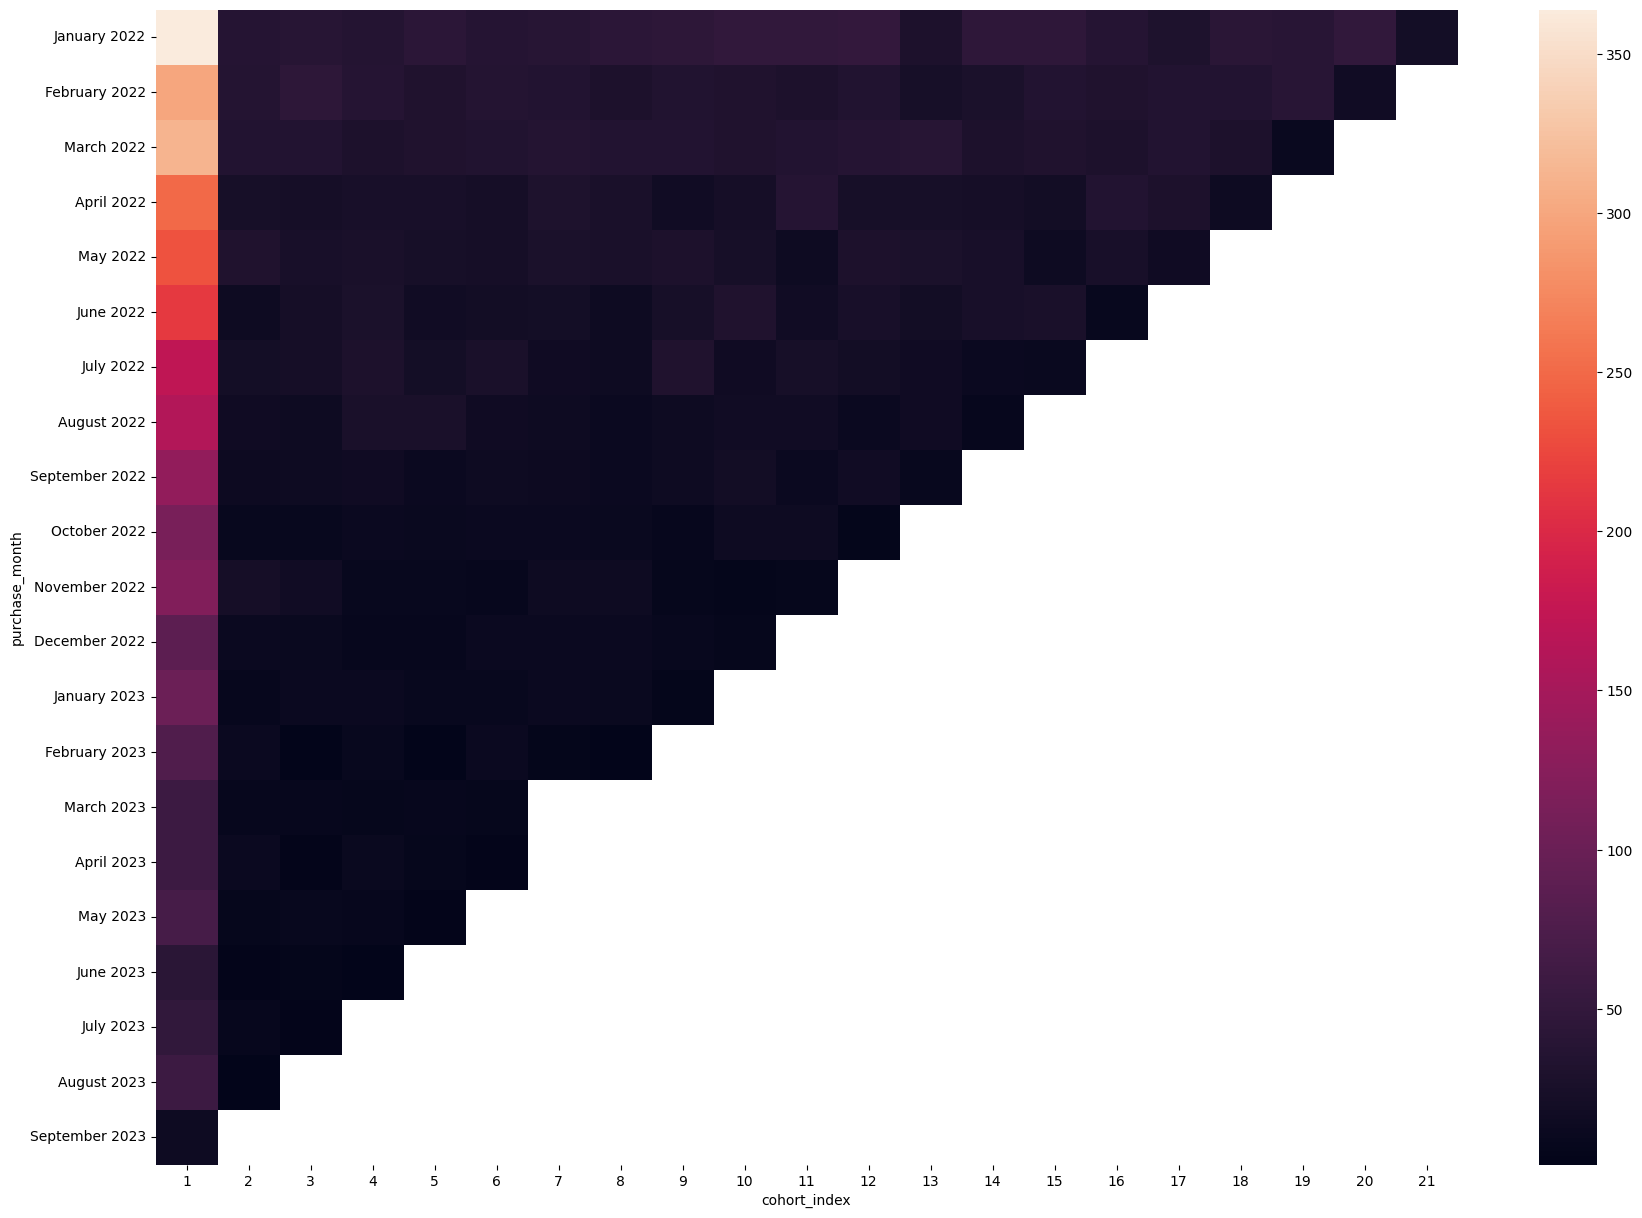

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21, 15))
sns.heatmap(cohort_table)

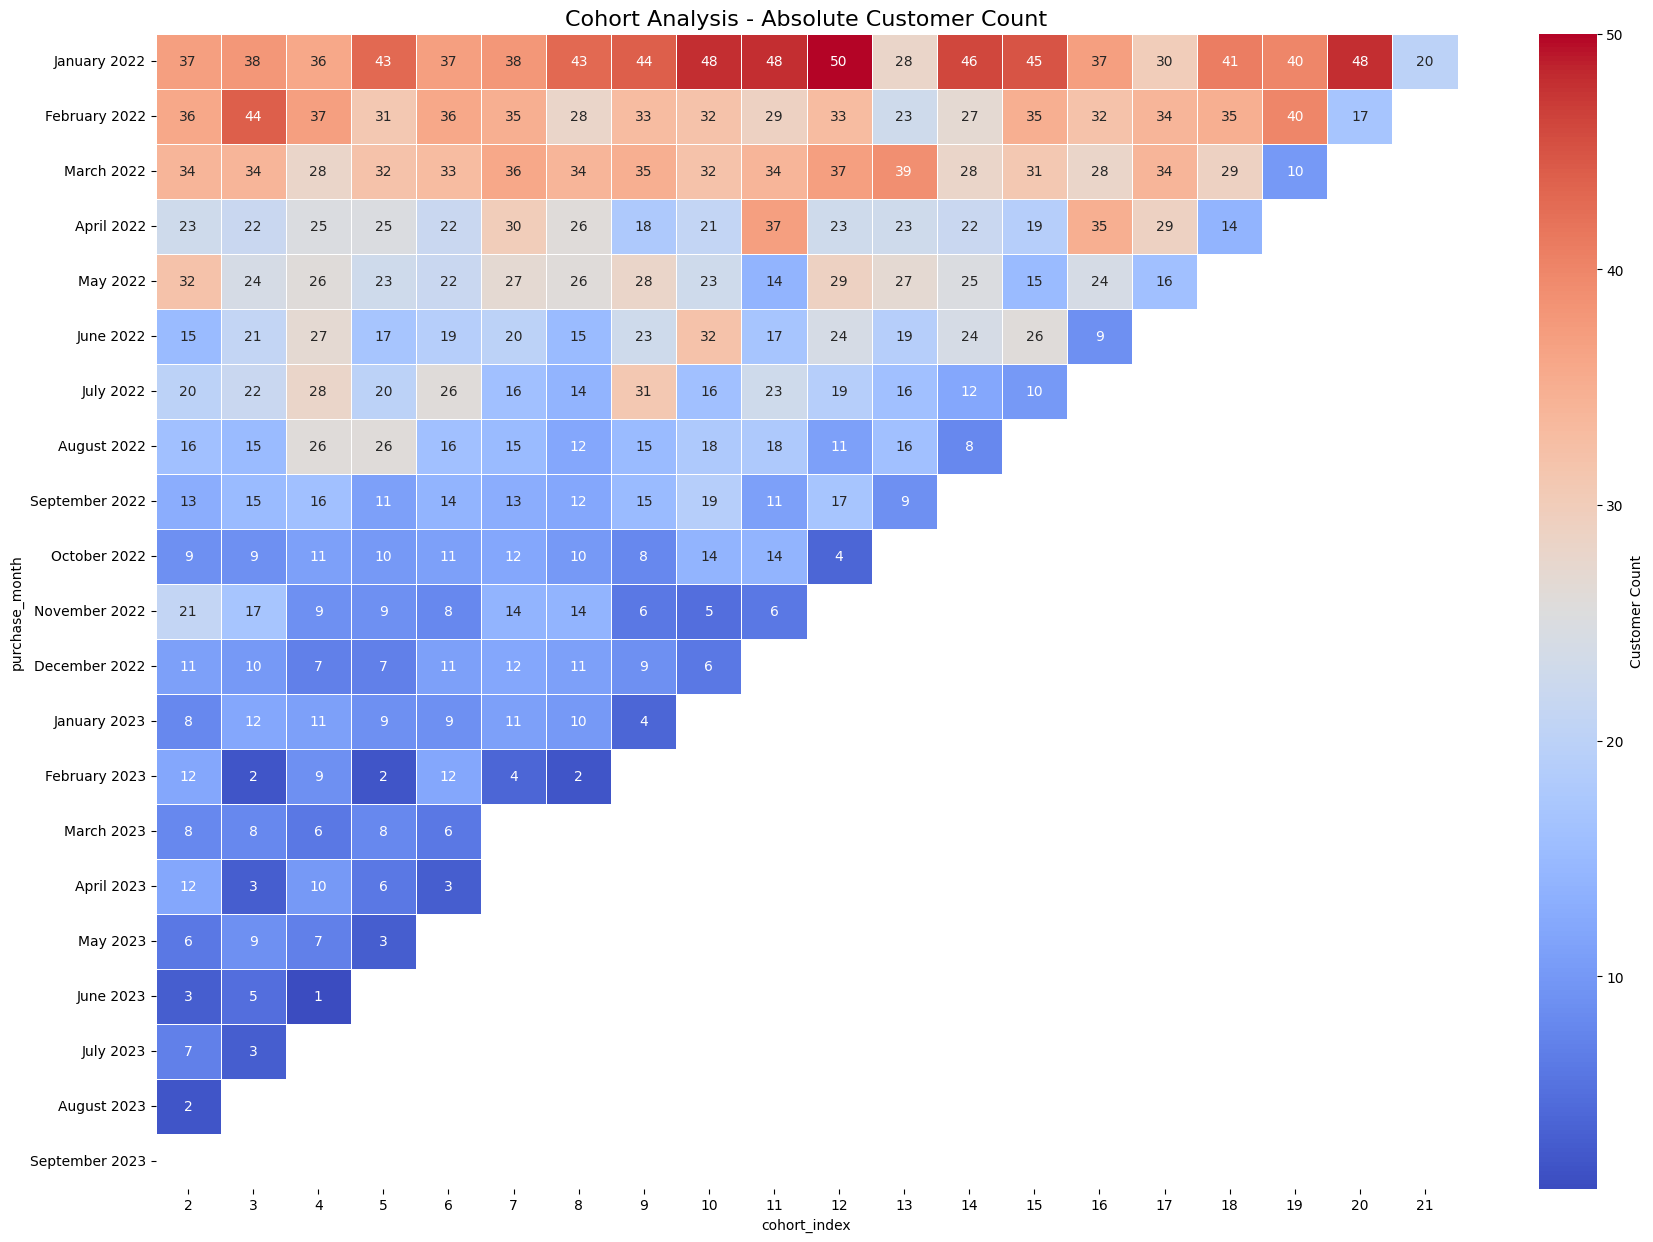

In [15]:
except_first_cohort = cohort_table.iloc[:, 1:] # 1번째 열이 너무 커서 삭제함
plt.figure(figsize=(21, 15))
sns.heatmap(
    except_first_cohort, 
    cmap='coolwarm',
    annot=True,
    fmt='.0f', 
    linewidths=0.5,
    cbar_kws={'label': 'Customer Count'}
)
plt.title("Cohort Analysis - Absolute Customer Count", fontsize=16)
plt.show()

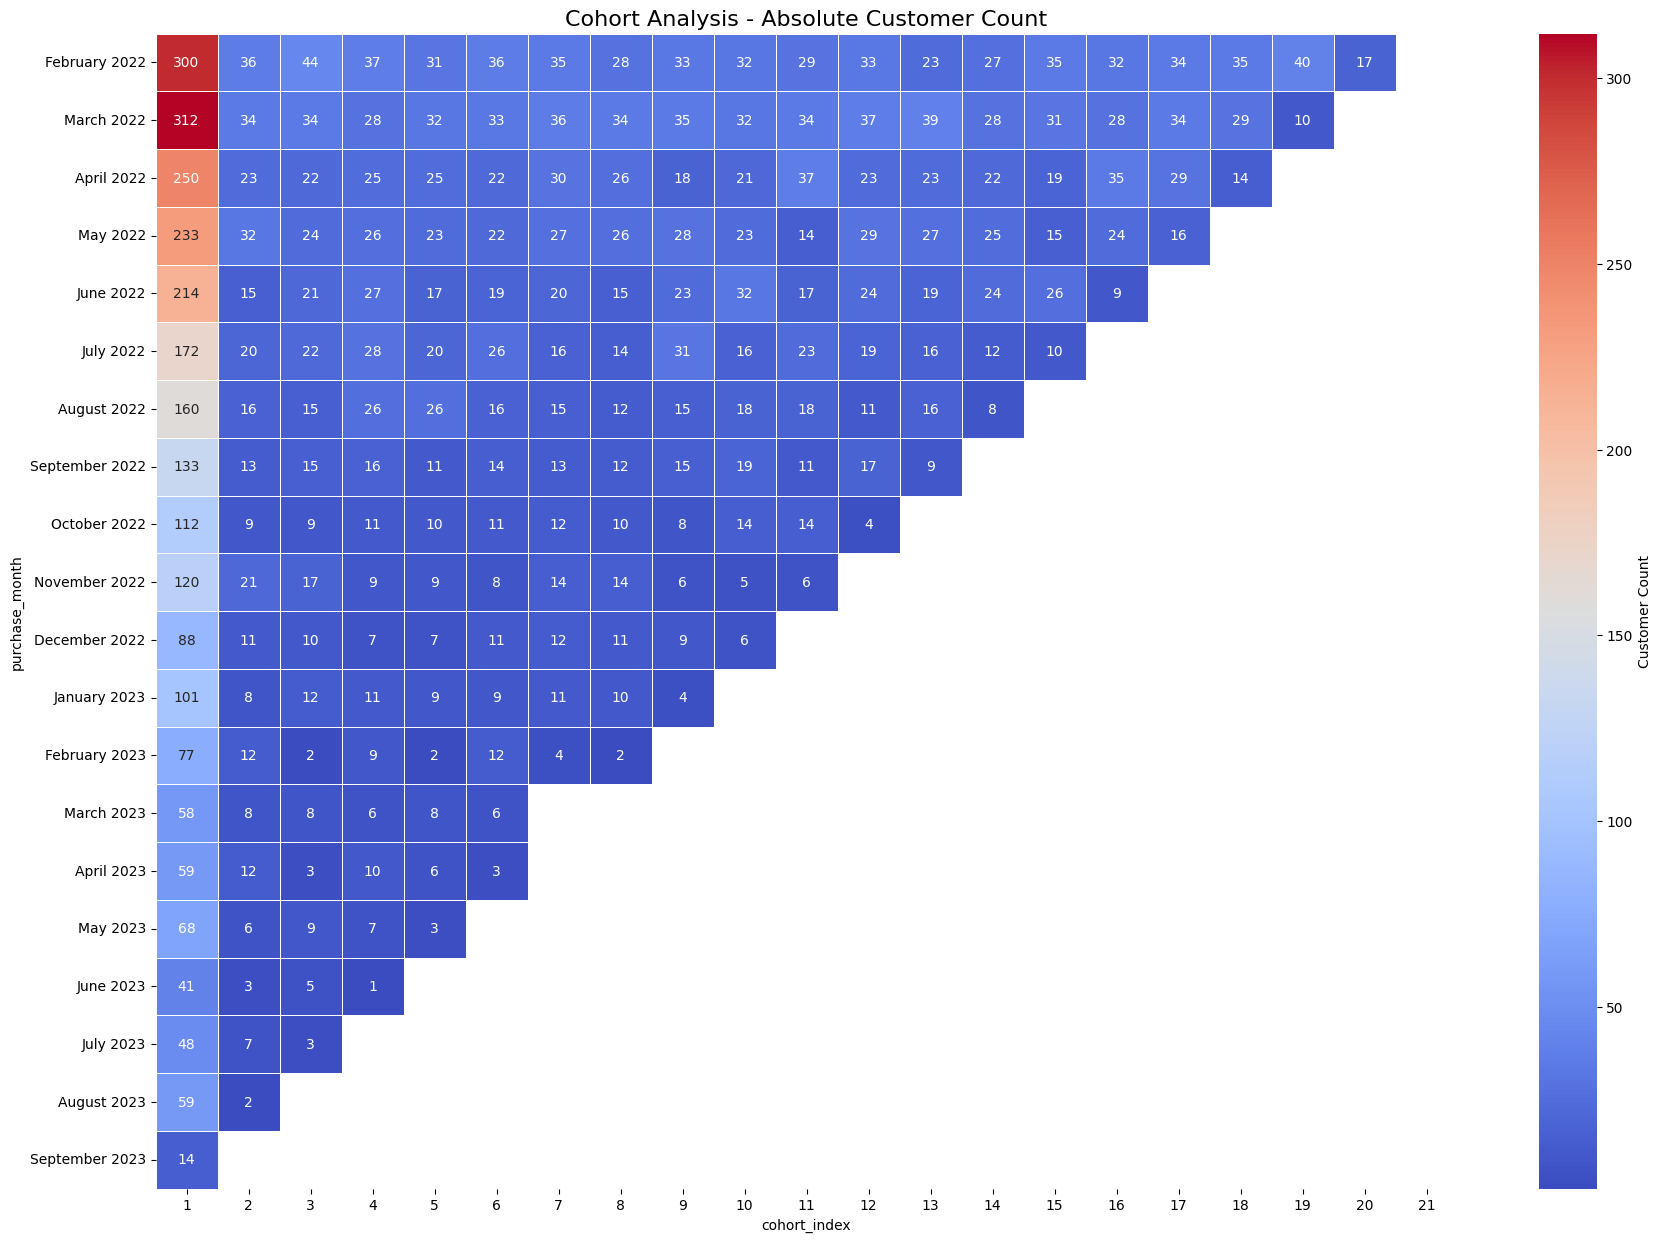

In [16]:
except_m1_cohort = cohort_table.iloc[1:, :]
plt.figure(figsize=(21, 15))
sns.heatmap(
    except_m1_cohort, 
    cmap='coolwarm',
    annot=True,
    fmt='.0f', 
    linewidths=0.5,
    cbar_kws={'label': 'Customer Count'}
)
plt.title("Cohort Analysis - Absolute Customer Count", fontsize=16)
plt.show()

In [17]:
january = cohort_table.loc['January 2022']
axis1_cohort_ratio = cohort_table.div(january, axis=1)
axis1_cohort_ratio

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.0
February 2022,0.824176,0.972973,1.157895,1.027778,0.720930,0.972973,0.921053,0.651163,0.750000,0.666667,...,0.66,0.821429,0.586957,0.777778,0.864865,1.133333,0.853659,1.00,0.354167,NaN
March 2022,0.857143,0.918919,0.894737,0.777778,0.744186,0.891892,0.947368,0.790698,0.795455,0.666667,...,0.74,1.392857,0.608696,0.688889,0.756757,1.133333,0.707317,0.25,NaN,NaN
April 2022,0.686813,0.621622,0.578947,0.694444,0.581395,0.594595,0.789474,0.604651,0.409091,0.437500,...,0.46,0.821429,0.478261,0.422222,0.945946,0.966667,0.341463,NaN,NaN,NaN
May 2022,0.640110,0.864865,0.631579,0.722222,0.534884,0.594595,0.710526,0.604651,0.636364,0.479167,...,0.58,0.964286,0.543478,0.333333,0.648649,0.533333,NaN,NaN,NaN,NaN
June 2022,0.587912,0.405405,0.552632,0.750000,0.395349,0.513514,0.526316,0.348837,0.522727,0.666667,...,0.48,0.678571,0.521739,0.577778,0.243243,NaN,NaN,NaN,NaN,NaN
July 2022,0.472527,0.540541,0.578947,0.777778,0.465116,0.702703,0.421053,0.325581,0.704545,0.333333,...,0.38,0.571429,0.260870,0.222222,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,0.439560,0.432432,0.394737,0.722222,0.604651,0.432432,0.394737,0.279070,0.340909,0.375000,...,0.22,0.571429,0.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,0.365385,0.351351,0.394737,0.444444,0.255814,0.378378,0.342105,0.279070,0.340909,0.395833,...,0.34,0.321429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

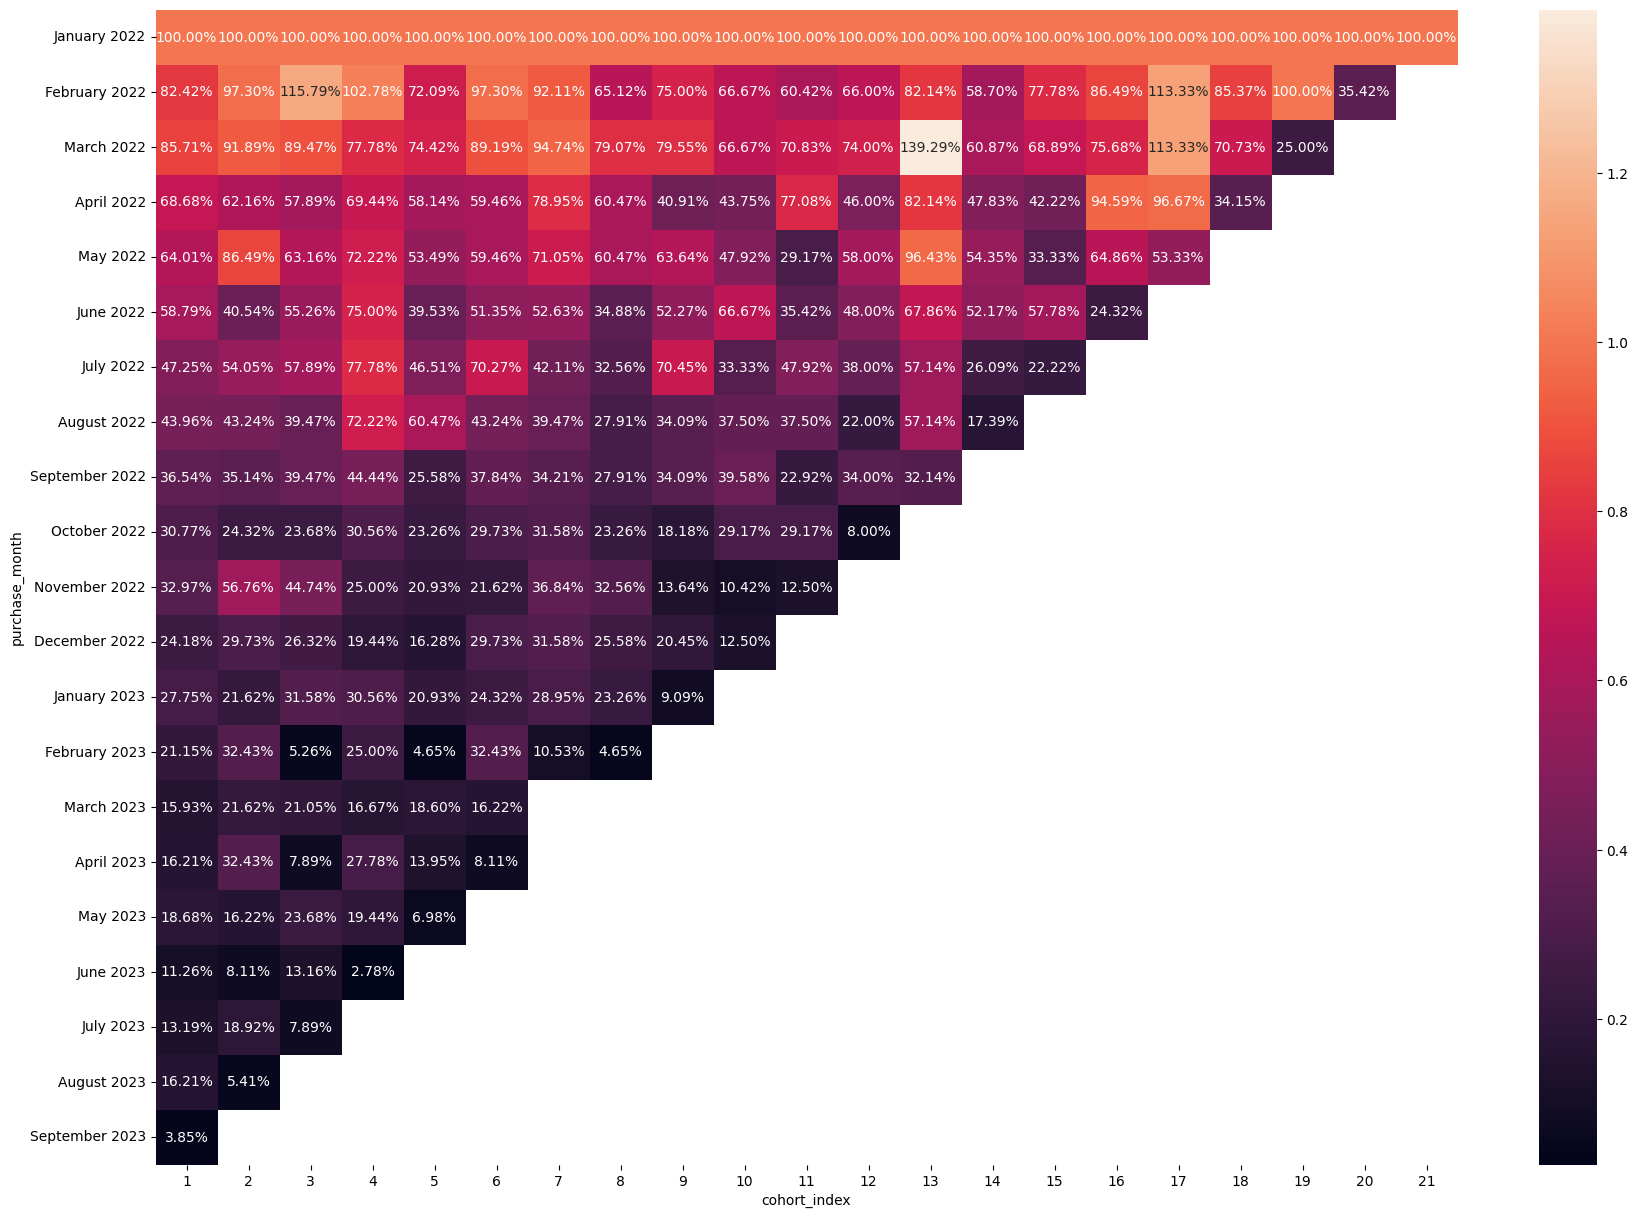

In [18]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis1_cohort_ratio, annot=True, fmt='.02%')

In [19]:
first = cohort_table.iloc[:, 0]
axis0_cohort_table = cohort_table.div(first, axis=0)
axis0_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
purchase_month,,,,,,,,,,,,,,,,,,,,,
January 2022,1.0,0.101648,0.104396,0.098901,0.118132,0.101648,0.104396,0.118132,0.120879,0.131868,...,0.137363,0.076923,0.126374,0.123626,0.101648,0.082418,0.112637,0.109890,0.131868,0.054945
February 2022,1.0,0.120000,0.146667,0.123333,0.103333,0.120000,0.116667,0.093333,0.110000,0.106667,...,0.110000,0.076667,0.090000,0.116667,0.106667,0.113333,0.116667,0.133333,0.056667,NaN
March 2022,1.0,0.108974,0.108974,0.089744,0.102564,0.105769,0.115385,0.108974,0.112179,0.102564,...,0.118590,0.125000,0.089744,0.099359,0.089744,0.108974,0.092949,0.032051,NaN,NaN
April 2022,1.0,0.092000,0.088000,0.100000,0.100000,0.088000,0.120000,0.104000,0.072000,0.084000,...,0.092000,0.092000,0.088000,0.076000,0.140000,0.116000,0.056000,NaN,NaN,NaN
May 2022,1.0,0.137339,0.103004,0.111588,0.098712,0.094421,0.115880,0.111588,0.120172,0.098712,...,0.124464,0.115880,0.107296,0.064378,0.103004,0.068670,NaN,NaN,NaN,NaN
June 2022,1.0,0.070093,0.098131,0.126168,0.079439,0.088785,0.093458,0.070093,0.107477,0.149533,...,0.112150,0.088785,0.112150,0.121495,0.042056,NaN,NaN,NaN,NaN,NaN
July 2022,1.0,0.116279,0.127907,0.162791,0.116279,0.151163,0.093023,0.081395,0.180233,0.093023,...,0.110465,0.093023,0.069767,0.058140,NaN,NaN,NaN,NaN,NaN,NaN
August 2022,1.0,0.100000,0.093750,0.162500,0.162500,0.100000,0.093750,0.075000,0.093750,0.112500,...,0.068750,0.100000,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2022,1.0,0.097744,0.112782,0.120301,0.082707,0.105263,0.097744,0.090226,0.112782,0.142857,...,0.127820,0.067669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='purchase_month'>

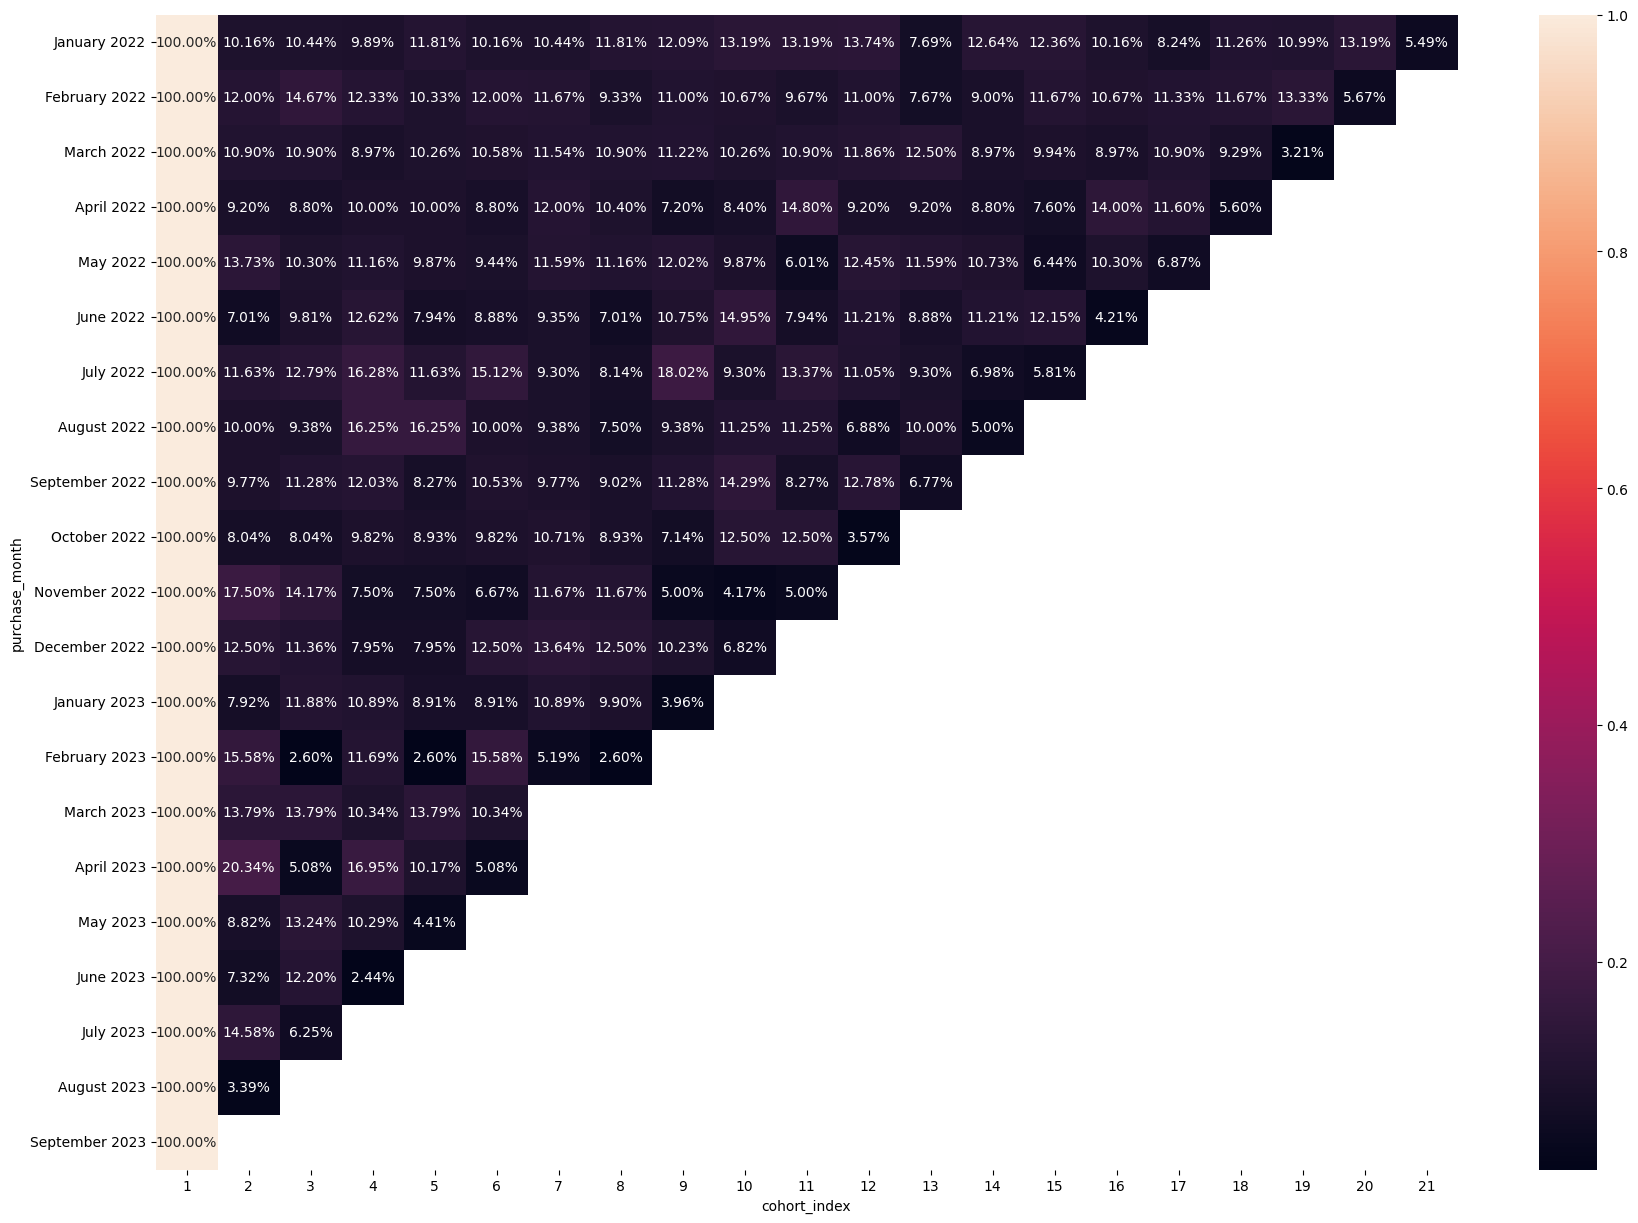

In [20]:
plt.figure(figsize=(21, 15))
sns.heatmap(axis0_cohort_table, annot=True, fmt='.02%')

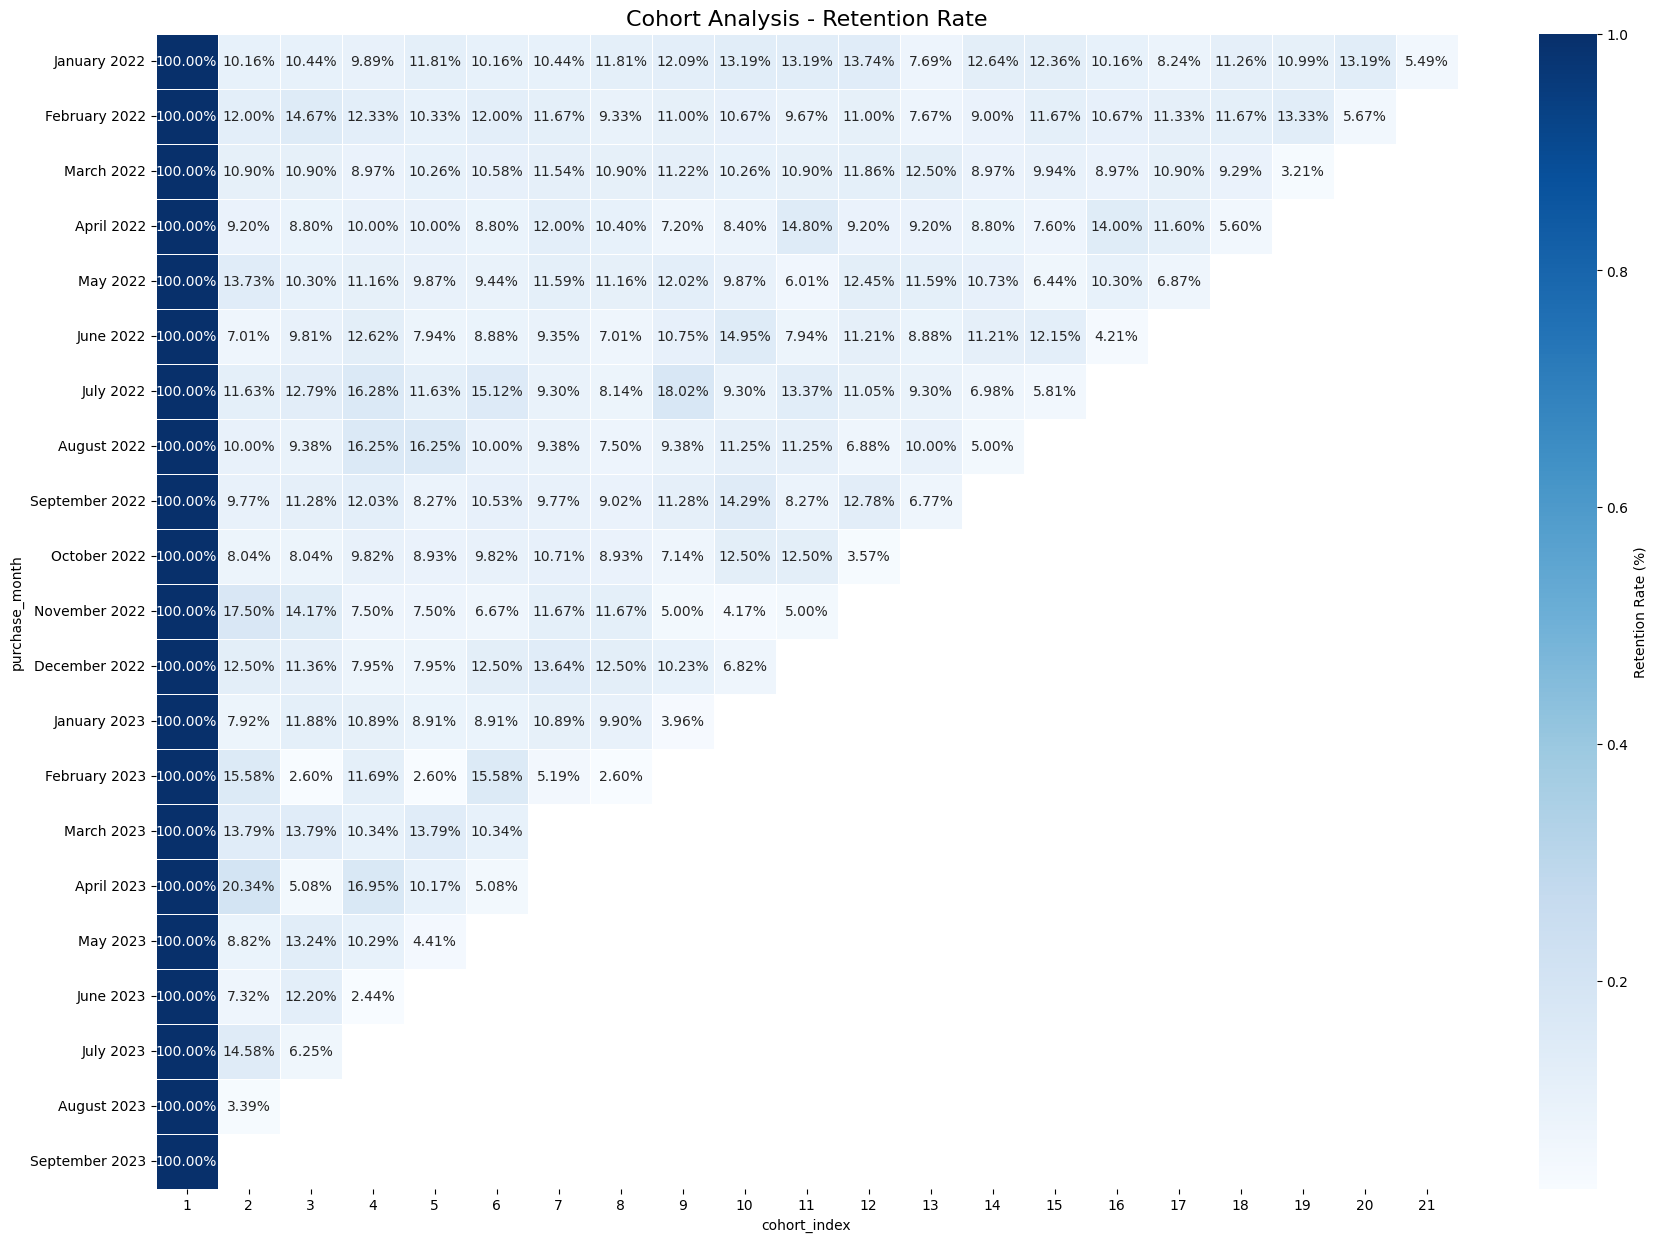

In [21]:
plt.figure(figsize=(21, 15))
sns.heatmap(
    axis0_cohort_table, 
    cmap='Blues',  
    annot=True, 
    fmt='.2%',  
    linewidths=0.5, 
    cbar_kws={'label': 'Retention Rate (%)'}
)
plt.title("Cohort Analysis - Retention Rate", fontsize=16)
plt.show()


In [22]:
ltv_df = customer2022.groupby(['purchase_month', 'cohort_index'])['total_purchase_amount'].sum().reset_index()

ltv_table = ltv_df.pivot(index='purchase_month', columns='cohort_index', values='total_purchase_amount')
ltv_table.index = ltv_table.index.strftime('%B %Y')

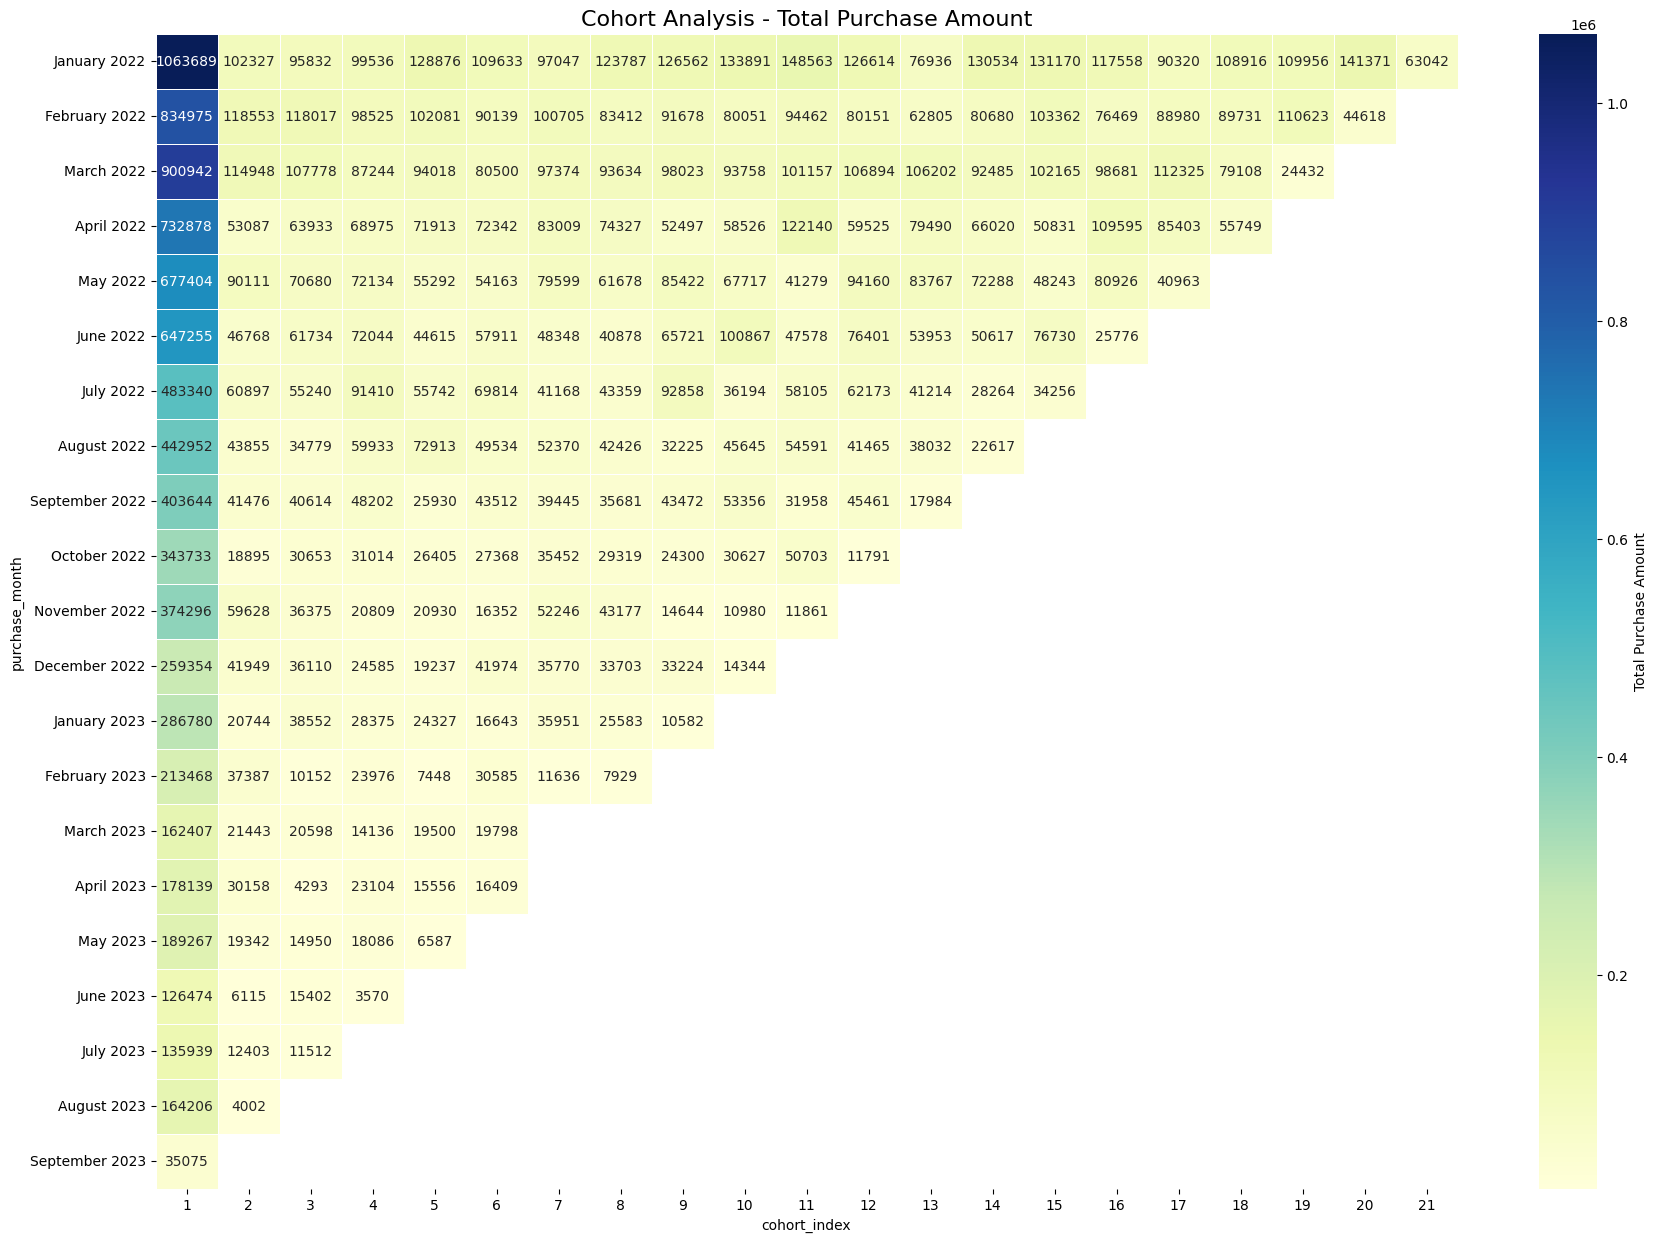

In [23]:
plt.figure(figsize=(21, 15))
sns.heatmap(
    ltv_table, 
    cmap='YlGnBu', 
    annot=True, 
    fmt='.0f', 
    linewidths=0.5, 
    cbar_kws={'label': 'Total Purchase Amount'}
)
plt.title("Cohort Analysis - Total Purchase Amount", fontsize=16)
plt.show()

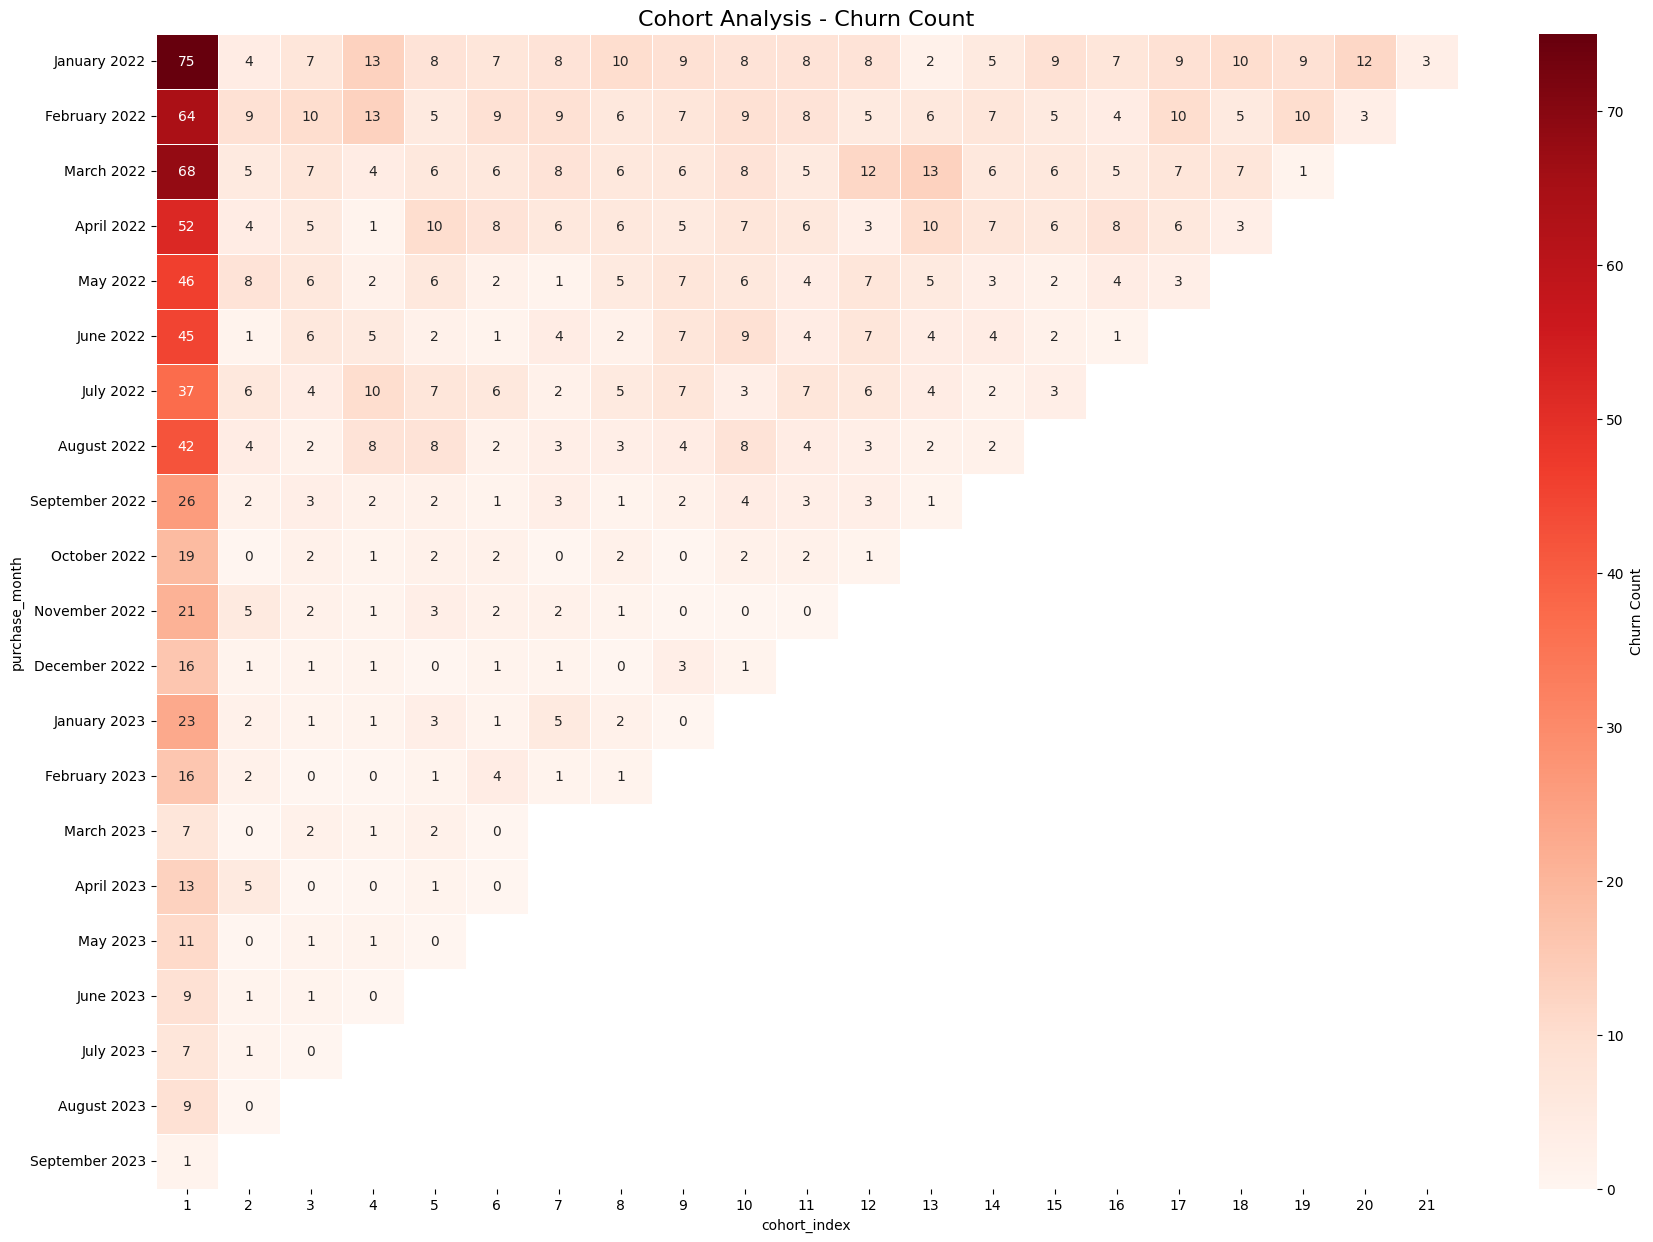

In [24]:
churn_df = customer2022.groupby(['purchase_month', 'cohort_index'])['churn'].sum().reset_index()

churn_table = churn_df.pivot(index='purchase_month', columns='cohort_index', values='churn')
churn_table.index = churn_table.index.strftime('%B %Y')

plt.figure(figsize=(21, 15))
sns.heatmap(
    churn_table, 
    cmap='Reds', 
    annot=True, 
    fmt='.0f', 
    linewidths=0.5, 
    cbar_kws={'label': 'Churn Count'}
)
plt.title("Cohort Analysis - Churn Count", fontsize=16)
plt.show()


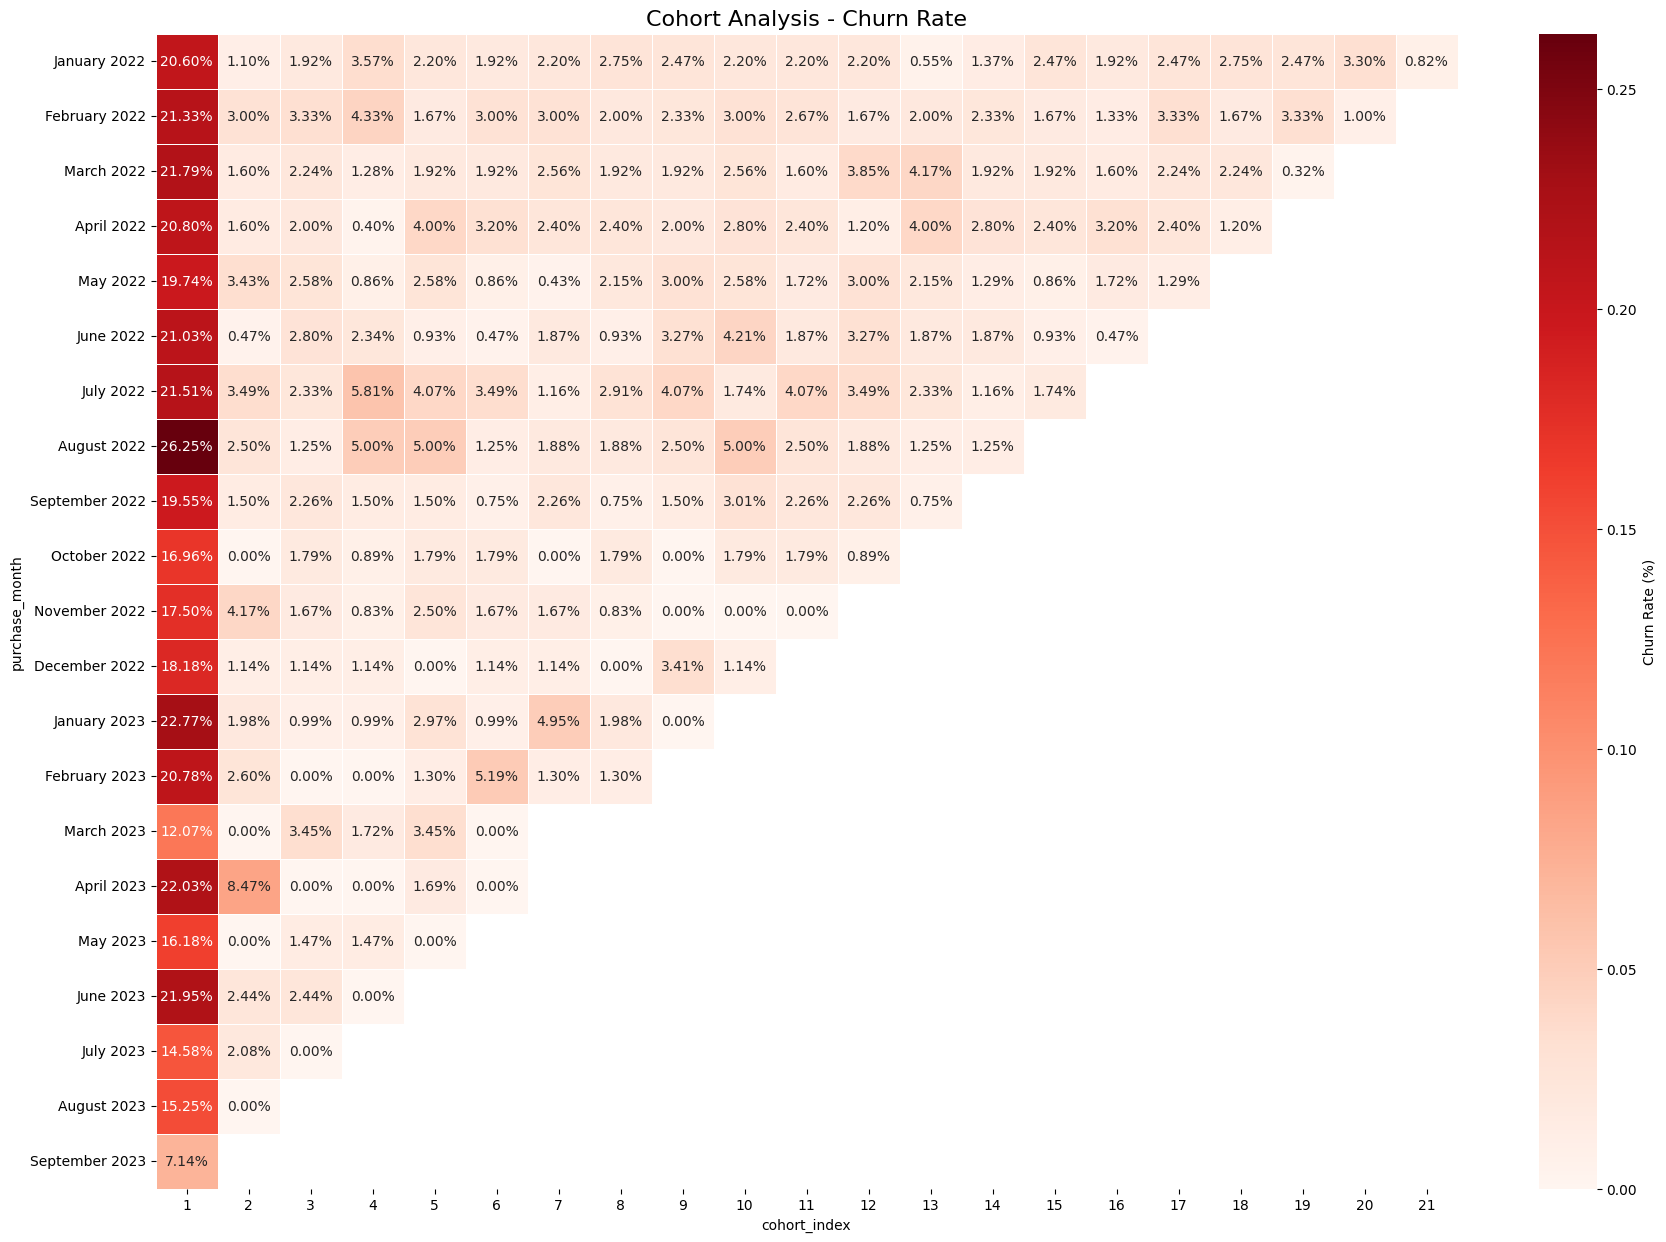

In [25]:
# 이탈률 비율
cohort_size = cohort_table.iloc[:, 0]  # 각 코호트의 최초 고객 수
churn_rate = churn_table.div(cohort_size, axis=0)

plt.figure(figsize=(21, 15))
sns.heatmap(
    churn_rate, 
    cmap='Reds', 
    annot=True, 
    fmt='.2%', 
    linewidths=0.5, 
    cbar_kws={'label': 'Churn Rate (%)'}
)
plt.title("Cohort Analysis - Churn Rate", fontsize=16)
plt.show()


In [26]:
customer_total_purchase = customer2022.groupby('customer_id')['total_purchase_amount'].sum()
print(customer_total_purchase.describe())

count     2983.000000
mean      6992.829366
std       4351.800256
min        125.000000
25%       3813.000000
50%       6226.000000
75%       9456.500000
max      26787.000000
Name: total_purchase_amount, dtype: float64


In [27]:
customer_total_purchase = customer2022.groupby('customer_id')['total_purchase_amount'].sum()

# 상위 20% 기준 금액
top_20_percent = customer_total_purchase.quantile(0.8)
print("상위 20% 기준 금액:", top_20_percent)

# 상위 20% 고객 추출
high_customers = customer_total_purchase[customer_total_purchase > top_20_percent]
print("상위 20% 고객 수:", len(high_customers))


상위 20% 기준 금액: 10505.4
상위 20% 고객 수: 597


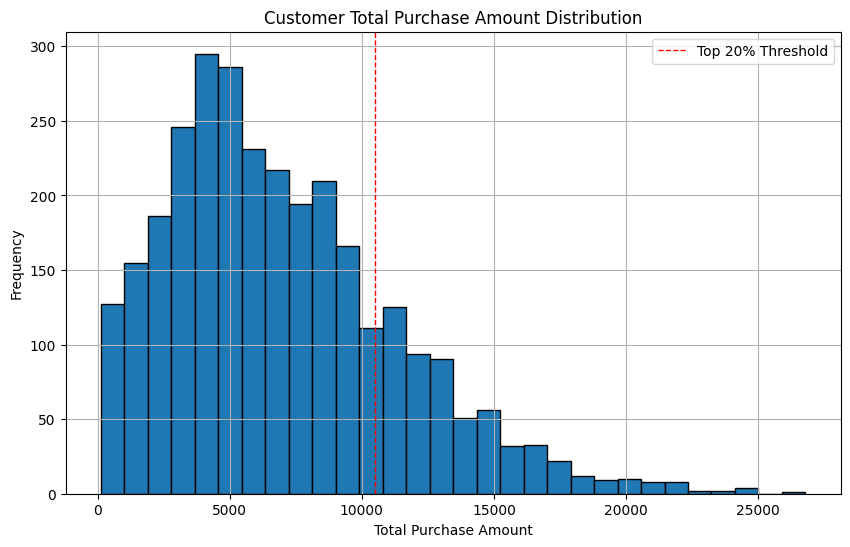

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
customer_total_purchase.hist(bins=30, edgecolor='k')
plt.axvline(top_20_percent, color='red', linestyle='dashed', linewidth=1, label='Top 20% Threshold')
plt.title('Customer Total Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25616\348425590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer2022['age_group'] = pd.cut(customer2022['customer_age'], bins=[0, 19, 29, 39, 49, 59, 100],
C:\Users\User\AppData\Local\Temp\ipykernel_25616\348425590.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn = customer2022.groupby('age_group')['churn'].mean()


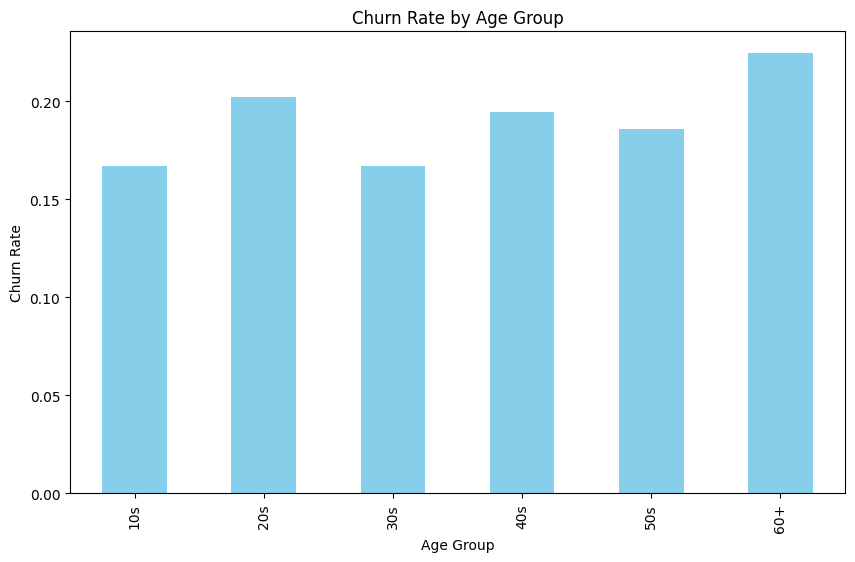

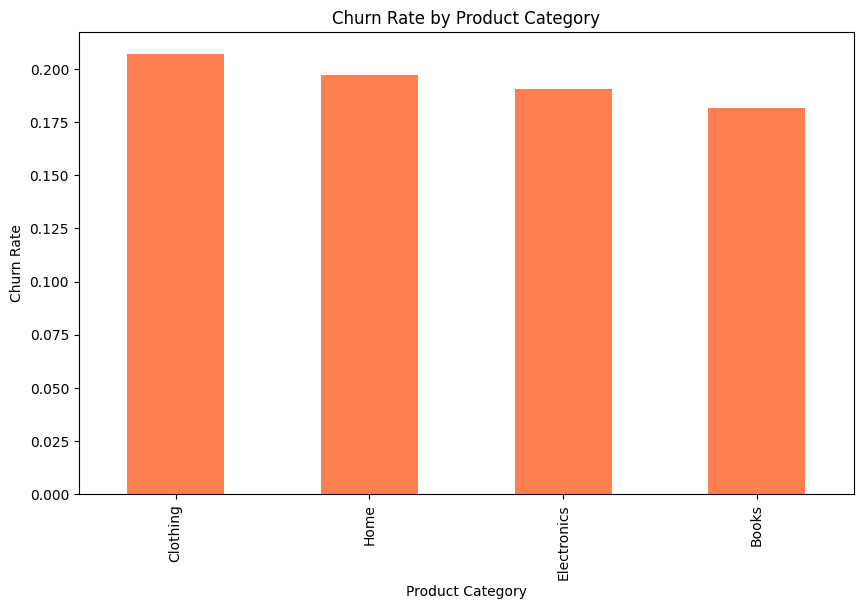

In [29]:
# 연령대별 이탈율 분석
customer2022['age_group'] = pd.cut(customer2022['customer_age'], bins=[0, 19, 29, 39, 49, 59, 100],
                                   labels=['10s', '20s', '30s', '40s', '50s', '60+'])
age_group_churn = customer2022.groupby('age_group')['churn'].mean()

plt.figure(figsize=(10, 6))
age_group_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

# 제품 카테고리별 이탈율 분석
category_churn = customer2022.groupby('product_category')['churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_churn.plot(kind='bar', color='coral')
plt.title('Churn Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Churn Rate')
plt.show()

In [30]:
first_purchase = customer2022.groupby('customer_id')['purchase_date'].min()
last_purchase = customer2022.groupby('customer_id')['purchase_date'].max()
customer_lifespan = (last_purchase - first_purchase).dt.days
display(pd.DataFrame(first_purchase))
display(pd.DataFrame(last_purchase))
display(pd.DataFrame(customer_lifespan))

,purchase_date
customer_id,
25,2022-02-22 21:20:43
34,2022-11-17 03:59:49
66,2022-01-12 00:30:38
76,2022-09-04 21:04:27
148,2022-12-26 20:52:10
...,...
49928,2022-01-20 06:34:44
49935,2023-02-05 13:12:28
49950,2022-02-23 08:40:49


,purchase_date
customer_id,
25,2022-09-25 08:48:31
34,2022-11-17 03:59:49
66,2023-07-28 00:34:28
76,2023-06-03 12:39:21
148,2023-07-02 06:22:10
...,...
49928,2022-01-20 06:34:44
49935,2023-02-05 13:12:28
49950,2022-07-10 00:26:53


,purchase_date
customer_id,
25,214
34,0
66,562
76,271
148,187
...,...
49928,0
49935,0
49950,136


평균 고객 유지 기간: 219.28일
중간값 고객 유지 기간: 203.0일
최소 고객 유지 기간: 0일
최대 고객 유지 기간: 617일


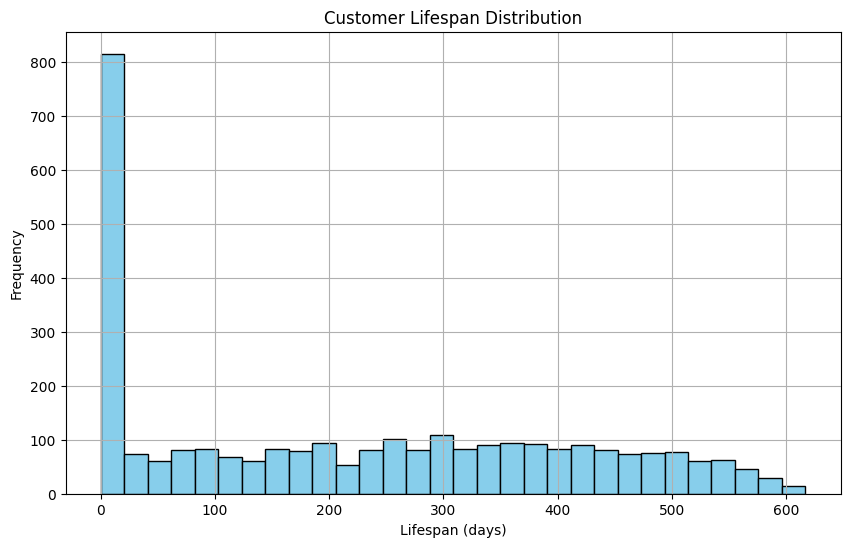

In [31]:
print(f"평균 고객 유지 기간: {round(customer_lifespan.mean(), 2)}일")
print(f"중간값 고객 유지 기간: {customer_lifespan.median()}일")
print(f"최소 고객 유지 기간: {customer_lifespan.min()}일")
print(f"최대 고객 유지 기간: {customer_lifespan.max()}일")

# 히스토그램으로 유지 기간 분포 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
customer_lifespan.hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Customer Lifespan Distribution")
plt.xlabel("Lifespan (days)")
plt.ylabel("Frequency")
plt.show()


                       total_purchase_amount  quantity   returns  lifespan
total_purchase_amount               1.000000  0.747269  0.508962  0.623364
quantity                            0.747269  1.000000  0.540051  0.642243
returns                             0.508962  0.540051  1.000000  0.438850
lifespan                            0.623364  0.642243  0.438850  1.000000


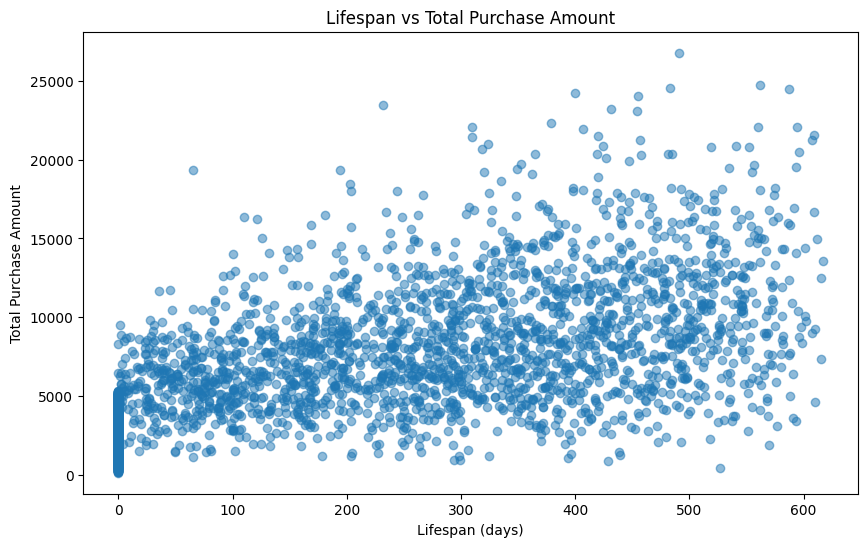

In [32]:
customer_summary = customer2022.groupby('customer_id').agg({
    'total_purchase_amount': 'sum',
    'quantity': 'sum',
    'returns': 'sum'
})
customer_summary['lifespan'] = customer_lifespan

# 유지 기간과 총 구매 금액 간 상관관계 확인
correlation = customer_summary.corr()
print(correlation)

# 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(customer_summary['lifespan'], customer_summary['total_purchase_amount'], alpha=0.5)
plt.title("Lifespan vs Total Purchase Amount")
plt.xlabel("Lifespan (days)")
plt.ylabel("Total Purchase Amount")
plt.show()



가설 2: 첫 구매 고객 중 재구매율이 높은 그룹은 특정 상품군 또는 프로모션에 반응한 고객일 가능성이 높다.

가설 3: 첫 구매 후 7일 이내에 리마인드 메시지를 받은 고객은 재구매 확률이 높아진다.

가설 4: 첫 구매 이후 한 달 이내에 재방문하지 않은 고객은 이탈할 가능성이 크다.

In [33]:
customer_lifespan0_ids = customer_summary[customer_summary['lifespan'] == 0].index.to_list()
customer_lifespan1_ids = customer_summary[customer_summary['lifespan'] != 0].index.to_list()
customer_lifespan0 = customer2022[customer2022['customer_id'].isin(customer_lifespan0_ids)]
customer_lifespan1 = customer2022[customer2022['customer_id'].isin(customer_lifespan1_ids)]
display(customer_lifespan0.head(2), len(customer_lifespan0_ids))
display(customer_lifespan1.head(2), len(customer_lifespan1_ids))

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index,age_group
227286,4248,2022-01-01 01:31:58,Clothing,320,2,4385,PayPal,40,1.0,Female,0,2022-01-01,1,40s
248477,10612,2022-01-01 21:16:17,Books,161,1,3479,Cash,39,0.0,Male,0,2022-01-01,1,30s


765

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index,age_group
125613,11491,2022-01-01 01:40:59,Electronics,21,1,727,PayPal,44,0.0,Female,0,2022-01-01,1,40s
83186,5498,2022-01-01 02:55:43,Home,401,2,347,PayPal,20,1.0,Female,1,2022-01-01,1,20s


2218

In [34]:
print(f"lifespan= 0 구매 수의 평균: {round(customer_lifespan0.groupby('customer_id').size().mean(), 2)}")
print(f"lifespan>=1 구매 수의 평균: {round(customer_lifespan1.groupby('customer_id').size().mean(), 2)}")

lifespan= 0 구매 수의 평균: 1.01
lifespan>=1 구매 수의 평균: 3.1


In [ ]:
# 고객의 평균 이탈율(합계/주문 수)
print(f"lifespan=0 고객의 평균 이탈율: { customer_lifespan0['churn'].sum() / len(customer_lifespan0):.4f}")
print(f"lifespan>=1 고객의 평균 이탈율: { customer_lifespan1['churn'].sum() / len(customer_lifespan1):.4f}")
print(f"lifespan=0 고객의 평균 return: { customer_lifespan0['returns'].sum() / len(customer_lifespan0):.4f}")
print(f"lifespan>=1 고객의 평균 return: { customer_lifespan1['returns'].sum() / len(customer_lifespan1):.4f}")


lifespan=0 고객의 평균 이탈율: 0.1964
lifespan>=1 고객의 평균 이탈율: 0.1939
lifespan=0 고객의 평균 return: 0.3953
lifespan>=1 고객의 평균 return: 0.4072


In [47]:
display(print(round(customer_lifespan0.groupby('customer_id')['churn'].mean().mean(), 4)))
display(print(round(customer_lifespan1.groupby('customer_id')['churn'].mean().mean(), 4)))


0.1948


None

0.1939


None

<Axes: xlabel='product_category'>

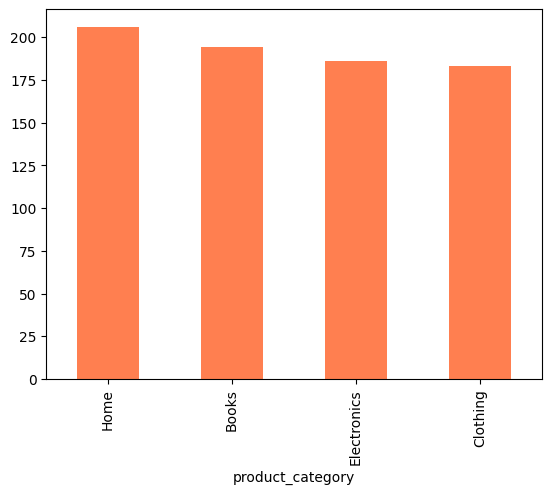

In [35]:
customer_lifespan0['product_category'].value_counts().plot(kind='bar', color='coral')

<Axes: xlabel='product_category'>

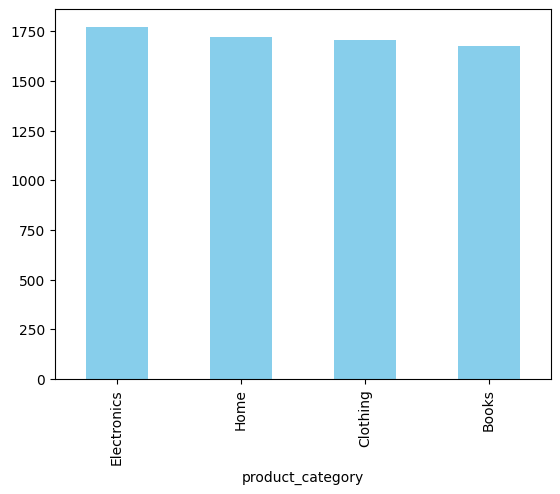

In [36]:
customer_lifespan1['product_category'].value_counts().plot(kind='bar', color='skyblue')

In [37]:
customer2022.head(2)

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index,age_group
227286,4248,2022-01-01 01:31:58,Clothing,320,2,4385,PayPal,40,1.0,Female,0,2022-01-01,1,40s
125613,11491,2022-01-01 01:40:59,Electronics,21,1,727,PayPal,44,0.0,Female,0,2022-01-01,1,40s


In [38]:
customer2022 = customer2022.merge(customer_lifespan, on='customer_id', how='left')
customer2022.rename(columns={'purchase_date_y': 'lifespan'}, inplace=True)
customer2022.head(2)

,customer_id,purchase_date_x,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index,age_group,lifespan
0,4248,2022-01-01 01:31:58,Clothing,320,2,4385,PayPal,40,1.0,Female,0,2022-01-01,1,40s,0
1,11491,2022-01-01 01:40:59,Electronics,21,1,727,PayPal,44,0.0,Female,0,2022-01-01,1,40s,551


In [39]:
lifespan_by_age_group = customer2022.groupby('age_group')['lifespan'].mean()

# 결과 출력
print(lifespan_by_age_group)

age_group
10s    327.821114
20s    289.815353
30s    299.669314
40s    291.374273
50s    293.767173
60+    286.923277
Name: lifespan, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_3952\2328808267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifespan_by_age_group = customer2022.groupby('age_group')['lifespan'].mean()


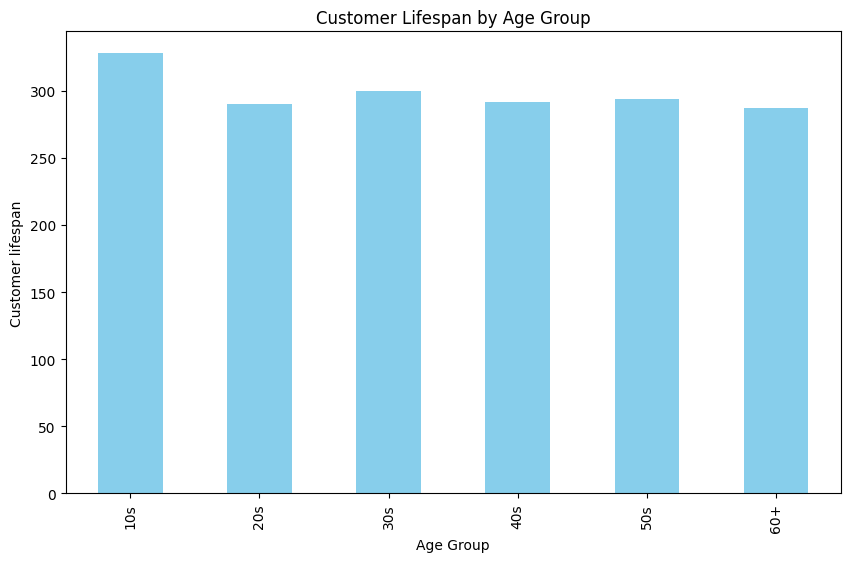

In [40]:
plt.figure(figsize=(10, 6))
lifespan_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Customer Lifespan by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer lifespan')
plt.show()

In [41]:
high_customers.head(10)


customer_id
66     18045
152    14097
214    11660
271    19721
294    10651
310    13092
369    12817
399    13606
425    12512
431    14957
Name: total_purchase_amount, dtype: int64

In [42]:
high_customers_data = customer2022[customer2022['customer_id'].isin(high_customers.index)]
high_customers_data.head(2)

,customer_id,purchase_date_x,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,cohort_index,age_group,lifespan
2,5498,2022-01-01 02:55:43,Home,401,2,347,PayPal,20,1.0,Female,1,2022-01-01,1,20s,607
7,36652,2022-01-01 16:09:20,Books,377,4,5125,Credit Card,58,1.0,Male,0,2022-01-01,1,50s,609


In [43]:
high_customers_data.drop(columns=['cohort_index'], inplace=True)
high_customers_data.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_3952\559907308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_customers_data.drop(columns=['cohort_index'], inplace=True)


,customer_id,purchase_date_x,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,purchase_month,age_group,lifespan
2,5498,2022-01-01 02:55:43,Home,401,2,347,PayPal,20,1.0,Female,1,2022-01-01,20s,607
7,36652,2022-01-01 16:09:20,Books,377,4,5125,Credit Card,58,1.0,Male,0,2022-01-01,50s,609
